# Questions that are covered by the analysis
1. What Technologies are preferred by frequent Open-Source contributors?
2. What Technologies are preferred by less frequent Open-Source contributors?
3. What are the most-used technologies in 2019?
4. What are the most-used technologies in 2020?
5. What are the most-used technologies in 2021?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Load in data from 2019 - 2021
df_2019 = pd.read_csv('./data/stack-overflow-developer-survey-2019/survey_results_public.csv')
df_2020 = pd.read_csv('./data/stack-overflow-developer-survey-2020/survey_results_public.csv')
df_2021 = pd.read_csv('./data/stack-overflow-developer-survey-2021/survey_results_public.csv')

# Clear rows where all entries are NA
df_2019.dropna(how='all')
df_2020.dropna(how='all')
df_2021.dropna(how='all')

# Add year column to all 3 datasets 
df_2019['Year'] = 2019
df_2020['Year'] = 2020
df_2021['Year'] = 2021

# combine all 3 datasets based on the year
df_2019_to_2021 = pd.concat([df_2019, df_2020, df_2021])
df_2019_to_2021.Year.unique()

array([2019, 2020, 2021], dtype=int64)

In [18]:
for column in df_2019_to_2021.columns:
    print(column)

Respondent
MainBranch
Hobbyist
OpenSourcer
OpenSource
Employment
Country
Student
EdLevel
UndergradMajor
EduOther
OrgSize
DevType
YearsCode
Age1stCode
YearsCodePro
CareerSat
JobSat
MgrIdiot
MgrMoney
MgrWant
JobSeek
LastHireDate
LastInt
FizzBuzz
JobFactors
ResumeUpdate
CurrencySymbol
CurrencyDesc
CompTotal
CompFreq
ConvertedComp
WorkWeekHrs
WorkPlan
WorkChallenge
WorkRemote
WorkLoc
ImpSyn
CodeRev
CodeRevHrs
UnitTests
PurchaseHow
PurchaseWhat
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechWorkedWith
MiscTechDesireNextYear
DevEnviron
OpSys
Containers
BlockchainOrg
BlockchainIs
BetterLife
ITperson
OffOn
SocialMedia
Extraversion
ScreenName
SOVisit1st
SOVisitFreq
SOVisitTo
SOFindAnswer
SOTimeSaved
SOHowMuchTime
SOAccount
SOPartFreq
SOJobs
EntTeams
SOComm
WelcomeChange
SONewContent
Age
Gender
Trans
Sexuality
Ethnicity
Dependents
SurveyLength
SurveyEase
Year
NEWCollab

In [83]:
df_2021.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly', 'Year'],
      dtype='object')

In [89]:
[x for x in df_2019_to_2021.columns if x in df_2019.columns and x in df_2020.columns and x in df_2021.columns]

['MainBranch',
 'Employment',
 'Country',
 'EdLevel',
 'OrgSize',
 'DevType',
 'YearsCode',
 'Age1stCode',
 'YearsCodePro',
 'CompTotal',
 'CompFreq',
 'OpSys',
 'SOVisitFreq',
 'SOAccount',
 'SOPartFreq',
 'SOComm',
 'Age',
 'Gender',
 'Trans',
 'Sexuality',
 'Ethnicity',
 'SurveyLength',
 'SurveyEase',
 'Year']

In [127]:
df_2021.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly', 'Year'],
      dtype='object')

In [21]:
frequent_open_src_contributers = df_2019_to_2021[df_2019_to_2021.OpenSourcer == 'Once a month or more often']
less_frequent_open_src_contributers = df_2019_to_2021[df_2019_to_2021.OpenSourcer == 'Less than once per year']

<BarContainer object of 19 artists>

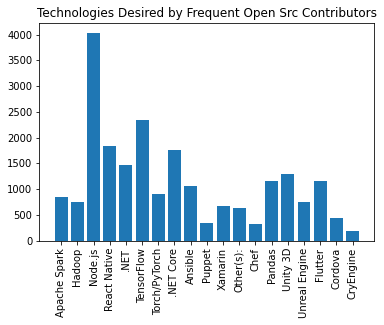

In [38]:
desiredTech = frequent_open_src_contributers.MiscTechDesireNextYear[frequent_open_src_contributers.MiscTechDesireNextYear.notna()]
from collections import defaultdict

desiredTechCounts = defaultdict(int)

for item in desiredTech:
    technologies = item.split(';')
    for technology in technologies:
        desiredTechCounts[technology] += 1

# print(desiredTechCounts)
names = list(desiredTechCounts.keys())
values = list(desiredTechCounts.values())

plt.title("Technologies Desired by Frequent Open Src Contributors")
plt.xticks(rotation="vertical")
plt.bar(range(len(names)), values, tick_label=names)

In [155]:
def create_count_dict(df):
    counts = defaultdict(int)

    for row in df:
        split = row.split(';')
        for item in split:
            counts[item] += 1
        

    # print(desiredTechCounts)
    names = list(counts.keys())
    values = list(counts.values())

    return [names, values, counts]

In [159]:
from heapq import nlargest
from operator import itemgetter

def top_k_items(mapper:list, k:int):
    res = nlargest(k, mapper.items(), key=itemgetter(1))
    return res


<BarContainer object of 19 artists>

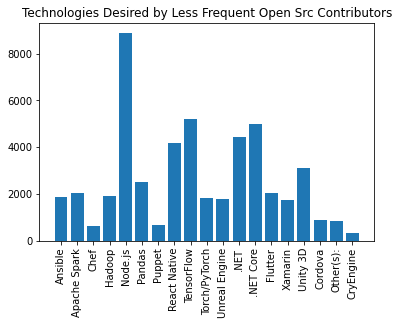

In [36]:
desiredTech2 = less_frequent_open_src_contributers.MiscTechDesireNextYear[less_frequent_open_src_contributers.MiscTechDesireNextYear.notna()]
from collections import defaultdict

desiredTechCounts2 = defaultdict(int)

for item in desiredTech2:
    technologies = item.split(';')
    for technology in technologies:
        desiredTechCounts2[technology] += 1

# print(desiredTechCounts)
names = list(desiredTechCounts2.keys())
values = list(desiredTechCounts2.values())

plt.title('Technologies Desired by Less Frequent Open Src Contributors')
plt.xticks(rotation="vertical")
plt.bar(range(len(names)), values, tick_label=names)

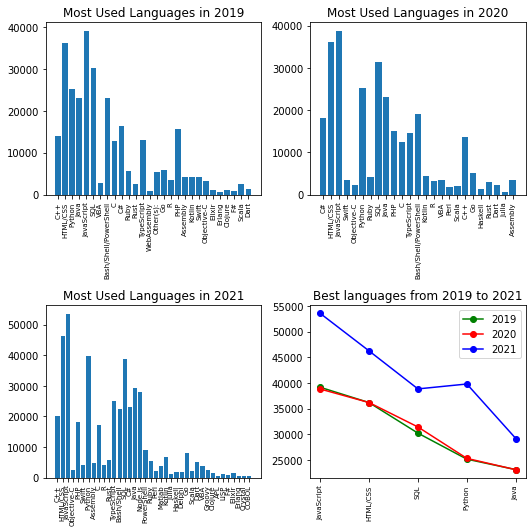

In [192]:
# Did the top 5 technolgies change from 2019 to 2021?
frequent_open_src_contributers = df_2019_to_2021[df_2019_to_2021.OpenSourcer != 'Never']
frequent_open_src_contributers.Year.unique()

frequent_open_src_contributers_19 = frequent_open_src_contributers[frequent_open_src_contributers.Year == 2019]
frequent_open_src_contributers_20 = frequent_open_src_contributers[frequent_open_src_contributers.Year == 2020]
frequent_open_src_contributers_21 = df_2021

desiredTech19 = frequent_open_src_contributers_19.LanguageWorkedWith[frequent_open_src_contributers_19.LanguageWorkedWith.notna()]
desiredTech20 = frequent_open_src_contributers_20.LanguageWorkedWith[frequent_open_src_contributers_20.LanguageWorkedWith.notna()]
desiredTech21 = frequent_open_src_contributers_21.LanguageHaveWorkedWith[frequent_open_src_contributers_21.LanguageHaveWorkedWith.notna()]

desireddict19 = create_count_dict(desiredTech19)
desireddict20 = create_count_dict(desiredTech20)
desireddict21 = create_count_dict(desiredTech21)

best_3_languages_2019 = top_k_items(desireddict19[2], 5)
best_3_languages_2020 = top_k_items(desireddict20[2], 5)
best_3_languages_2021 = top_k_items(desireddict21[2], 5)


fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)
ax1.bar(desireddict19[0], desireddict19[1])
ax1.set_title('Most Used Languages in 2019')

ax2.bar(desireddict20[0], desireddict20[1])
ax2.set_title('Most Used Languages in 2020')

ax3.bar(desireddict21[0], desireddict21[1])
ax3.set_title('Most Used Languages in 2021')

# Make a line plot that counts the number of time the top 5 languages
# made an appearance each year or a line graph with a line for every year
names = [x[0] for x in best_3_languages_2019]
ax4.plot(names, [x[1] for x in best_3_languages_2019],  'g', marker='o', label='2019')
ax4.plot(names, [x[1] for x in best_3_languages_2020], 'r', marker='o', label='2020')

import plotly.express as ex

values = []
for name in names:
    if name in desireddict21[2]:
        values.append(desireddict21[2][name])

ax4.plot(names, values, 'b', marker='o', label='2021')
ax4.set_title('Best languages from 2019 to 2021')

for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='x', which='major', rotation=90, labelsize=7)

fig.tight_layout()

plt.legend()
plt.show()
